In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [5]:

# Load the data again. Keep air quality data, drop the index column
# and any missing data columns.
df = pd.read_csv(
    'https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Default.csv'
).iloc[:,1:].dropna()

# Recode strings to numeric.
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()


Y_train = df_train['income'].values.reshape(-1, 1)


In [6]:
# Make some new features to capture potential quadratic and cubic
# relationships between solar radiation and day or temperature.
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]

In [26]:
# create an array of r2 values for both lasso and ridge regression
lambda_list = np.arange(1,10000,10)
r2_lasso_values = []
r2_ridge_values = []

for alpha in lambda_list:
    lass = linear_model.Lasso(alpha=alpha)
    lass.fit(X_train2, Y_train)
    lassscore = lass.score(X_train2, Y_train)
    r2_lasso_values.append(lassscore)
    
    ridgeregr = linear_model.Ridge(alpha=alpha, fit_intercept=False) 
    ridgeregr.fit(X_train2, Y_train)
    ridgescore = ridgeregr.score(X_train2, Y_train)
    r2_ridge_values.append(ridgescore)
    
#print(r2_lasso_values)
#print(r2_ridge_values)

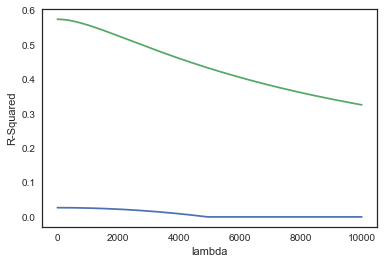

In [27]:
#Create a plot below of how  R2  varies across different values of  λ  for ridge and lasso regression. 
#Use logic and code similar to the ridge regression demonstration above, 
#and base your plot on the X_train2 feature set.

plt.plot(lambda_list, r2_lasso_values)
plt.plot(lambda_list, r2_ridge_values)
plt.xlabel('lambda')
plt.ylabel('R-Squared')
